## En este programa integramos el problema de 2 cuerpos (P2C). 
## Todos los datos son facilmente modificables y los programas son facilmente reproducibles.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Generamos las condiciones iniciales

In [2]:
G = 4.299e-6   # Unidades kpc*Msol^-1*(km/s)**2
eps = 0.9      #softening 
N = 2

e = 0.7     # excentricidad de la orbita
p = 10.     #distancia al pericentro
a = p/(1-e) #el semieje lo definimos asi para que 
            #la particula siempre este inicialmente en 10kpc

m = np.array([5e11, 1e5]) #masas

mu = G *(m[0]+m[1])
nn = np.sqrt(mu/a**3)

vp = nn * a * np.sqrt((1+e)/(1-e)) #velocidad en el pericentro
# vp=0.
print vp

604.4957180022038


In [3]:
apo = a*(1+e)
b = a * np.sqrt(1-e**2)
print b, a

23.804761428476162 33.3333333333


In [4]:
#periodo
T = 2*pi/nn
print T

0.8247630920233773


In [5]:
#posiciones y velocidades iniciales

pos = np.array([[0.,0.,0.],[p,0.,0.]])

vel = np.array([[0.,0.,0.],[0.,vp,0.]])


In [6]:
print pos

[[ 0.  0.  0.]
 [10.  0.  0.]]


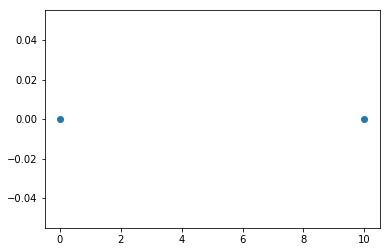

In [7]:
plt.plot(pos[:,0],pos[:,1],'o')

In [9]:
from integradorespdc import *

ax,ay,az = integradores_modificado.aceleracion(eps,m,pos[:,0],pos[:,1],pos[:,2])

### Acá definimos el paso y el numero de pasos

In [8]:
dt = 0.0005  #paso
nit = 1000000 #numero de pasos

# EULER

In [10]:
from integradorespdc import *

integradores_modificado.euler(eps,dt,nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)


(array([-8.5593929e-06,  5.0847515e+01], dtype=float32),
 array([ 0.06044272, 14.5512295 ], dtype=float32),
 array([0., 0.], dtype=float32),
 array([-8.060551e-06,  4.029364e+01], dtype=float32),
 array([9.4825307e-05, 1.3036397e+02], dtype=float32),
 array([0., 0.], dtype=float32),
 array([ 1.4783257e-04, -7.3916284e+02], dtype=float32),
 array([ 4.2130079e-05, -2.1065039e+02], dtype=float32),
 array([0., 0.], dtype=float32))

In [10]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'

N = 2

posf = np.loadtxt(path+'pos_euler.dat')
xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_euler.dat')
vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(100001, 2)


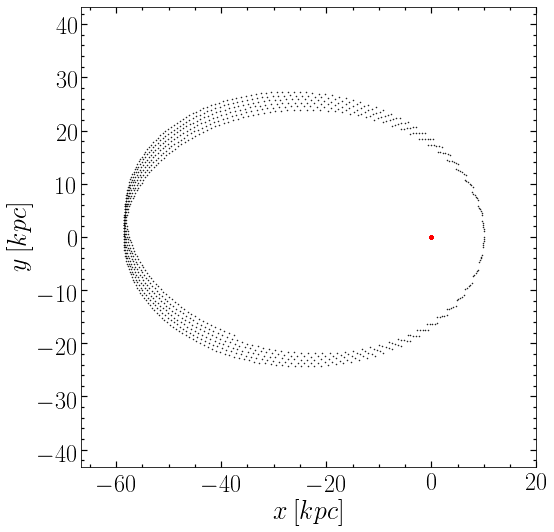

In [95]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=1)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
# ax.plot(xf[-1,1],yf[-1,1],'.b')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [11]:
from energia import *
eps=0.9
e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [12]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'
np.savetxt(path+'epot_euler.dat', e_pot)

In [13]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'
epot = np.loadtxt(path+'epot_euler.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

(100001,)
(100001,)
(100001,)


/home/omarioni/miniconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


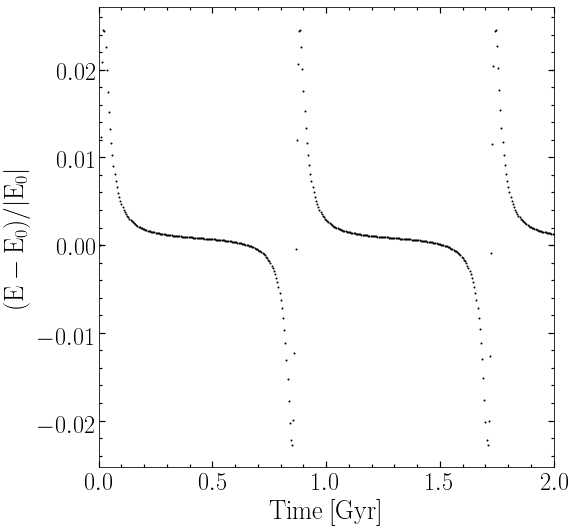

In [14]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.set_xlim(0,2)
# ax.set_ylim(-0.2,0.2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

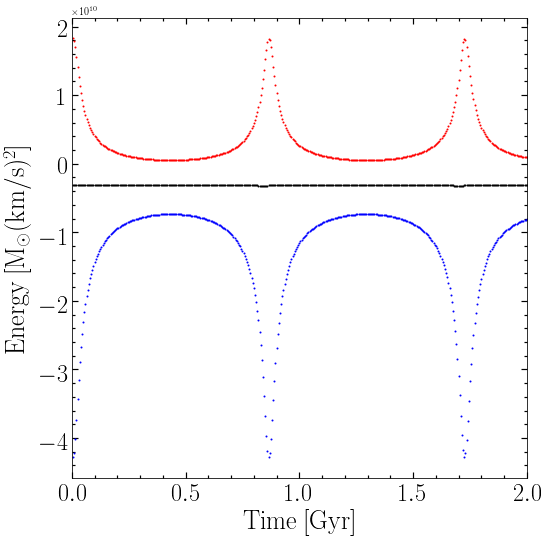

In [15]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [143]:
Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

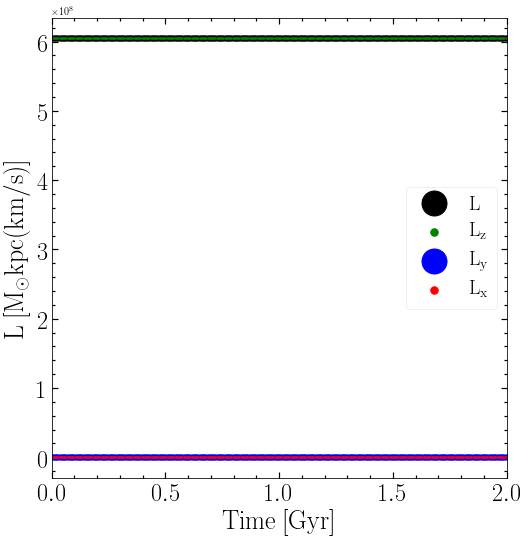

In [144]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=10)
Lz_ = ax.plot(time,Lz,'.g', markersize=3)
Ly_ = ax.plot(time,Ly,'.b', markersize=10)
Lx_ = ax.plot(time,Lx,'.r', markersize=3)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{z}}$','$\mathrm{L_{y}}$','$\mathrm{L_{x}}$'], loc='best', fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# RUNGE

In [11]:
from integradorespdc import *

runge_ = integradores_modificado.rungek(eps,dt,nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)

In [139]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'

posf = np.loadtxt(path+'pos_runge.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_runge.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(100001, 2)


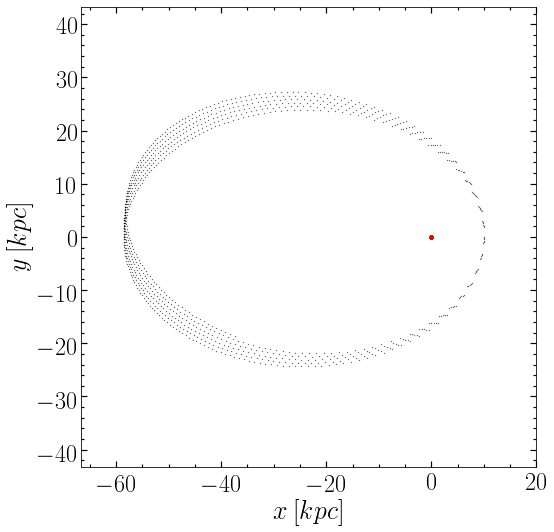

In [21]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=0.5)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [22]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])

In [23]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'
np.savetxt(path+'epot_runge.dat', e_pot)

In [116]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'
epot = np.loadtxt(path+'epot_runge.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

(100001,)
(100001,)
(100001,)


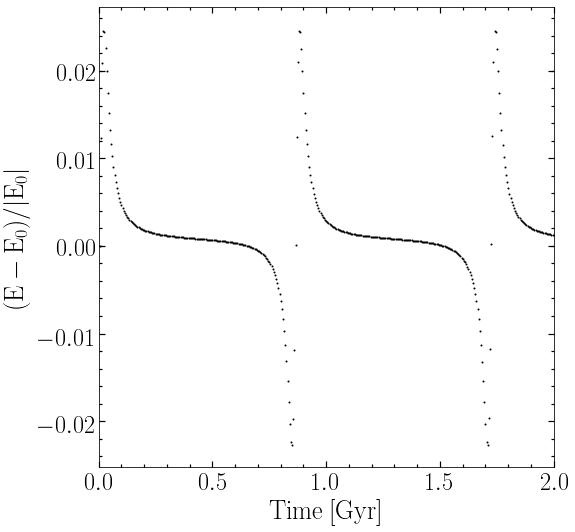

In [117]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

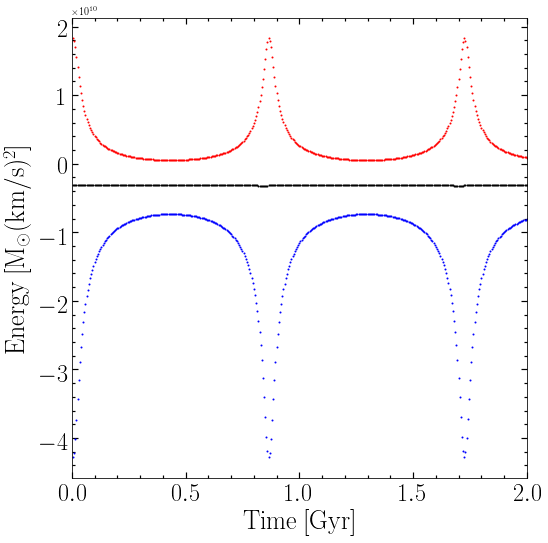

In [118]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [140]:
Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

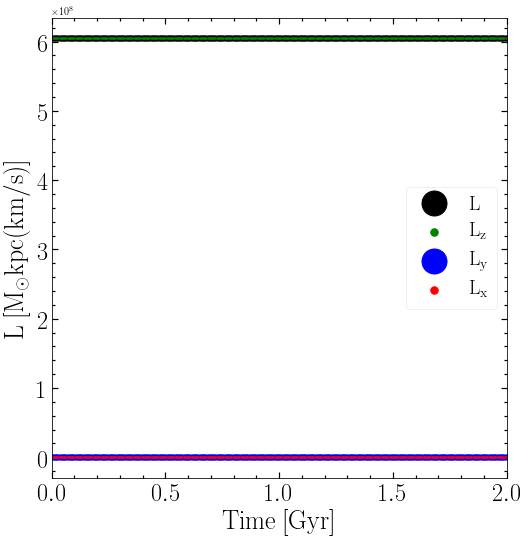

In [141]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=10)
Lz_ = ax.plot(time,Lz,'.g', markersize=3)
Ly_ = ax.plot(time,Ly,'.b', markersize=10)
Lx_ = ax.plot(time,Lx,'.r', markersize=3)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{z}}$','$\mathrm{L_{y}}$','$\mathrm{L_{x}}$'], loc='best', fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# LEAPFROG -KDK

In [36]:
from integradorespdc import *
lfkdk_ = integradores_modificado.kickdkick(eps,dt,nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)

In [135]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'

posf = np.loadtxt(path+'pos_KDK.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_KDK.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(100001, 2)


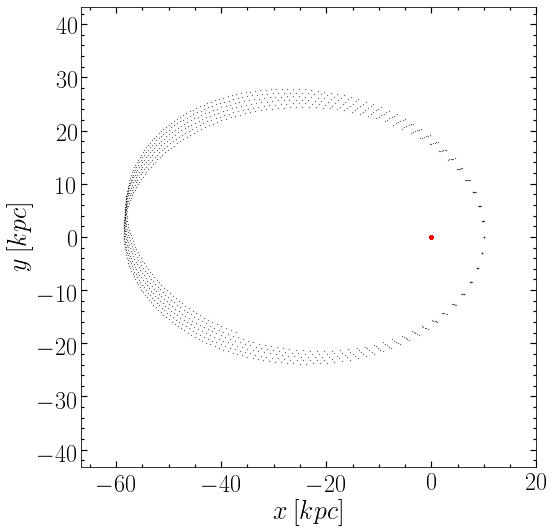

In [37]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=0.5)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [38]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [39]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'
np.savetxt(path+'epot_KDK.dat', e_pot)

In [122]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'
epot = np.loadtxt(path+'epot_KDK.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

(100001,)
(100001,)
(100001,)


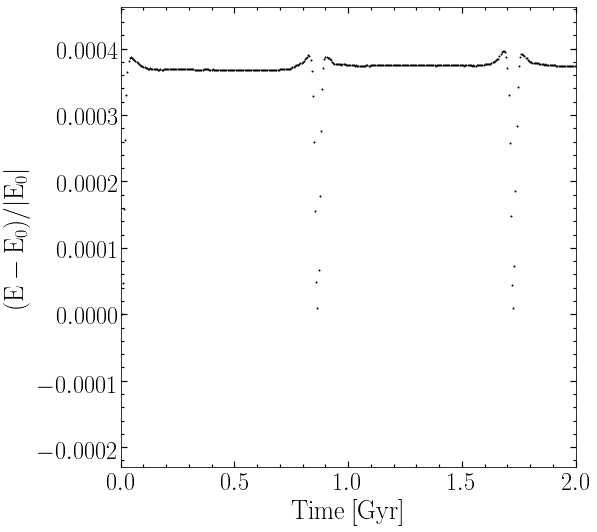

In [123]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

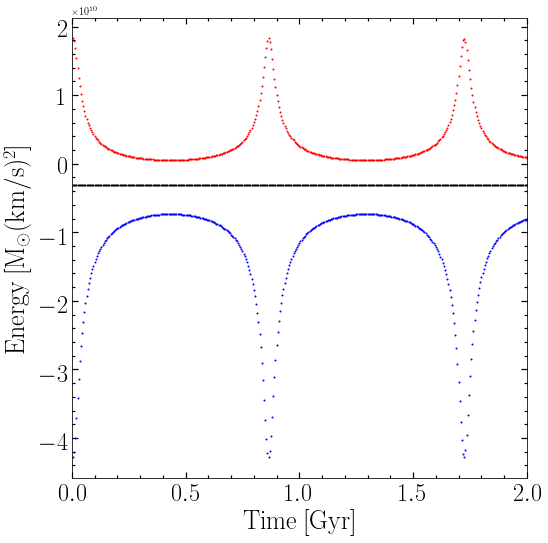

In [124]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [137]:
Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

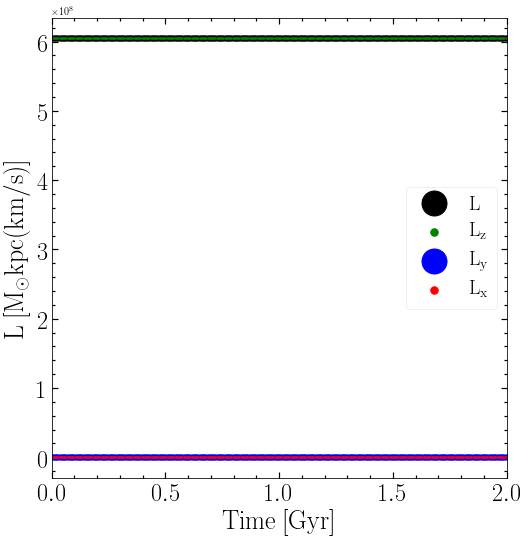

In [138]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=10)
Lz_ = ax.plot(time,Lz,'.g', markersize=3)
Ly_ = ax.plot(time,Ly,'.b', markersize=10)
Lx_ = ax.plot(time,Lx,'.r', markersize=3)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{z}}$','$\mathrm{L_{y}}$','$\mathrm{L_{x}}$'], loc='best', fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

# LEAPFROG -DKD

In [52]:
from integradorespdc import *
lfdkd_ = integradores_modificado.driftkdrift(eps,dt,nit,m,pos[:,0],pos[:,1],pos[:,2],vel[:,0],vel[:,1],vel[:,2],ax,ay,az)

In [127]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'

posf = np.loadtxt(path+'pos_DKD.dat')

xf = posf[:,0:N]
yf = posf[:,N:2*N]
zf = posf[:,2*N:3*N]

velf = np.loadtxt(path+'vel_DKD.dat')

vxf = velf[:,0:N]
vyf = velf[:,N:2*N]
vzf = velf[:,2*N:3*N]

print shape(xf)

(100001, 2)


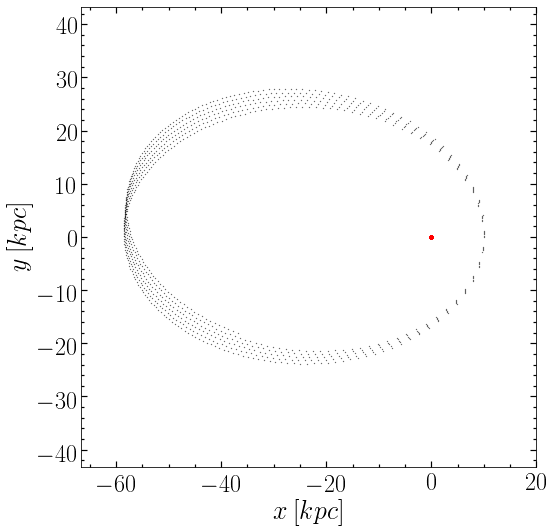

In [44]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(xf[:1000,1],yf[:1000,1],'.k', markersize=0.5)
ax.plot(xf[:1000,0],yf[:1000,0],'.r')
ax.set_xlim(-apo-10,p+10)
ax.set_ylim(-a-10,a+10)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_xlabel(r'$x\:[kpc]$', fontsize=26)
ax.set_ylabel(r'$y\:[kpc]$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [45]:
from energia import *

e_pot = np.zeros([1+nit/10,N])

for i in np.arange(1+nit/10):
    e_pot[i] = energia.epot(eps,m,xf[i,:],yf[i,:],zf[i,:])


In [46]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'
np.savetxt(path+'epot_DKD.dat', e_pot)

In [128]:
path = '/home/omarioni/mn2/_data/P2C/fortran_run/'
epot = np.loadtxt(path+'epot_DKD.dat')

U = np.sum(epot,axis =1)
print shape(U)

K = (1/2.) * m * (vxf**2 + vyf**2 + vzf**2)
K = np.sum(K,axis=1)
print shape(K)

E = K - 0.5*U

dE = (E - E[0])/abs(E[0])
time = dt * np.arange(10,nit+20,10) 
print shape(time)

(100001,)
(100001,)
(100001,)


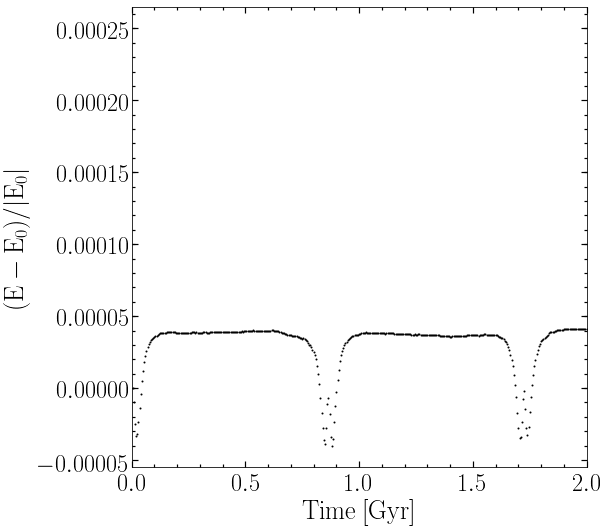

In [129]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,dE,'.k', markersize=2)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{(E-E_{0})/|E_{0}|}$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

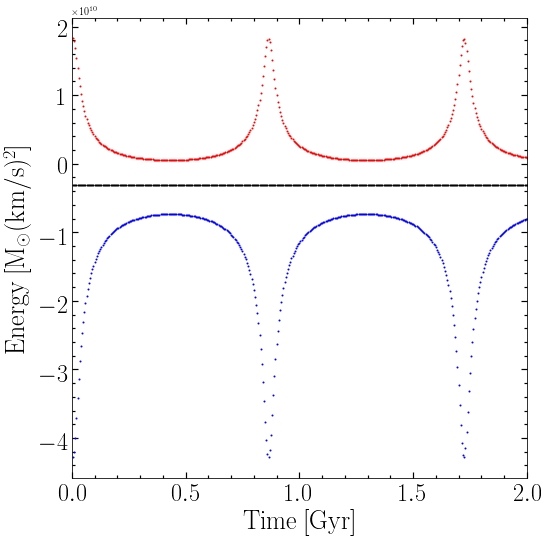

In [130]:
from __future__ import unicode_literals

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True

fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)
ax.plot(time,E,'.k', markersize=2)
ax.plot(time,K,'.r', markersize=2)
ax.plot(time,-U,'.b', markersize=2)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{Energy\:[M_\odot (km/s)^2}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()

In [131]:
Lx = np.sum(m*(yf*vzf - zf*vyf), axis=1)
Ly = np.sum(m*(zf*vxf - xf*vzf), axis=1)
Lz = np.sum(m*(xf*vyf - yf*vxf), axis=1)

L = np.sqrt(Lx**2 + Ly**2 + Lz**2)

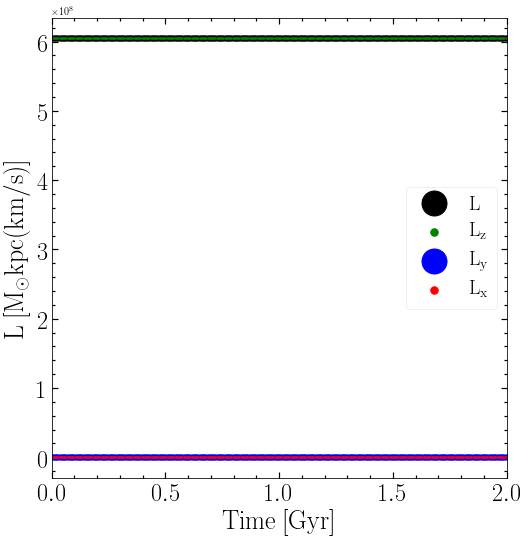

In [134]:
fig=plt.figure(1, figsize=(8,8))
fig.subplots_adjust(bottom=0.15, left =0.16, right = 0.95, top = 0.95)
ax=fig.add_subplot(111)

L_ = ax.plot(time,L,'.k', markersize=10)
Lz_ = ax.plot(time,Lz,'.g', markersize=3)
Ly_ = ax.plot(time,Ly,'.b', markersize=10)
Lx_ = ax.plot(time,Lx,'.r', markersize=3)
ax.set_xlim(0,2)
ax.minorticks_on()
ax.tick_params( labelsize=24)
ax.tick_params('both', length=3, width=1.2,which='minor', direction='in', right='on',top='on')
ax.tick_params('both', length=6, width=1.2,which='major', direction='in', right='on',top='on') 
ax.set_ylabel(r'$\mathrm{L\:[M_\odot kpc (km/s)}]$', fontsize=26)
ax.set_xlabel(r'$\mathrm{Time\:[Gyr]}$',fontsize=26)
ax.legend(['$\mathrm{L}$','$\mathrm{L_{z}}$','$\mathrm{L_{y}}$','$\mathrm{L_{x}}$'], loc='best', fontsize=20,markerscale=5,framealpha=0.3)
# fig.savefig('/home/ornela/Dropbox/AAA_2017/escrito/BAAA_2018_art/fig_05.pdf', dpi = 100)
plt.show()